# Linear Regression from Scratch with pure Python

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


**The mean squared error or mean squared deviation of an estimator measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value**

![](https://www.gstatic.com/education/formulas/images_long_sheet/en/mean_squared_error.svg)

![Image1 of MSE](msee.jpg)
![Image2 of MSE](mse2.jpg)

In [2]:
def mean_squared_error(x, y, slope, bias):
    return ((y - (slope*x + bias))**2).sum()


def mse_prime(x,y):
    n = x.count()
    x_mean = x.mean()
    y_mean = y.mean()
    slope = ((n*x_mean*y_mean)-(x*y).sum())/(n*(x_mean**2) - (x**2).sum())
    bias = (((x*y).sum()) - (slope * ((x**2).sum())))/ (n*x_mean)
    return slope, bias 


def predict(x):
    return slope*x + bias

# Testing the function on Original Dataset

In [3]:
# Loading the dataset with Pandas (skipping original name header)
test_df = pd.read_csv('real_estate.csv', names=['y', 'x'], skiprows=1)
print(test_df.shape)
test_df.head()

(100, 2)


,y,x
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [4]:
# plt.style.available

In [5]:
# plt.xkcd()

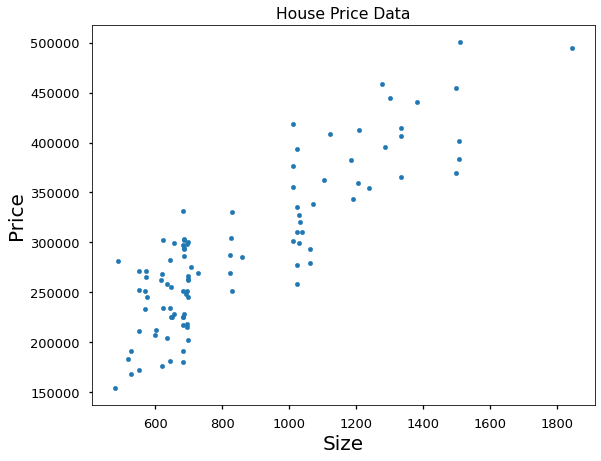

In [6]:
# Plotting the Scatter Plot of Data
plt.style.use('seaborn-talk')
test_df.plot('x', 'y', kind='scatter', figsize=(9,7))
plt.title('House Price Data')
plt.xlabel('Size', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [7]:
slope, bias = mse_prime(test_df.x, test_df.y)
print(f"Slope: {slope}")
print(f"Bias: {bias}")

Slope: 223.17874259460783
Bias: 101912.60180122861


#### Plotting our fitted line into the data

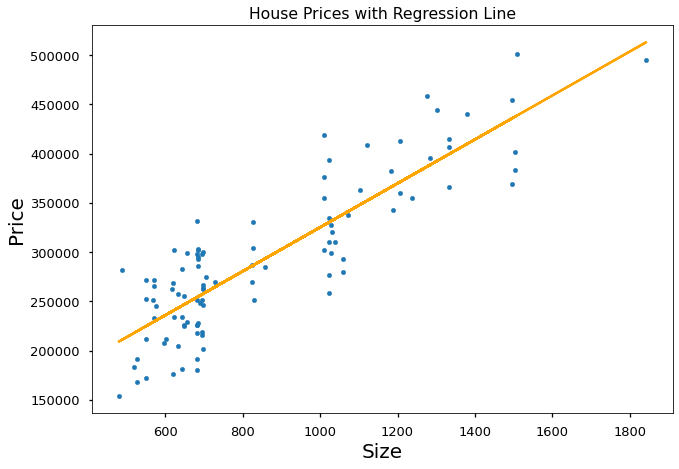

In [8]:
test_df.plot('x', 'y',kind='scatter')
plt.plot(test_df.x, (test_df.x*slope)+bias, c='orange')
plt.title('House Prices with Regression Line')
plt.xlabel('Size', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

<h1 style='color:gray;'><b>Checking the Mean Squared Error</b></h1>

In [9]:
mean_squared_error(test_df.x, test_df.y, slope, bias)

150032070866.28915

# Comparing with Scikit-Learn Implementation

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
lr.fit(test_df.x.values.reshape(-1,1), test_df.y.values.reshape(-1,1))

LinearRegression()

In [12]:
lr.intercept_

array([101912.60180123])

In [13]:
lr.coef_

array([[223.17874259]])

In [14]:
predict(np.array([643,1500]))

array([245416.53328956, 436680.71569314])

In [15]:
from sklearn import metrics

metrics.mean_squared_error(test_df.y, predict(test_df.x))

1500320708.6628916

# Modular format of LRFS

In [29]:
class LinearRegression:
    def __init__(self):
        pass
    
    
    def fit(self, x,y):
        n = x.count()
        x_mean = x.mean()
        y_mean = y.mean()
        self.coef_ = ((n*x_mean*y_mean)-(x*y).sum())/(n*(x_mean**2) - (x**2).sum())
        self.intercept_ = (((x*y).sum()) - (slope * ((x**2).sum())))/ (n*x_mean)
        return None 


    def predict(self, x):
        return self.slope*x + self.bias
        
        

In [33]:
lin = LinearRegression()

In [34]:
lin.fit(test_df.x, test_df.y)

In [35]:
lin.intercept_

101912.60180122861